# Wikilambda the Ultimate

The Wikimedia foundation’s search for the perfect language

[Michael Falk](https://michaelfalk.io) [](https://orcid.org/0000-0001-9261-8390) (The University of Melbourne)

In 2020, the Wikimedia foundation launched its first new project in nearly a decade. The new project consists of two main parts: (1) Wikifunctions, a library of programming functions; and (2) Abstract Wikipedia, a language-agnostic Wikipedia that will be dynamically translated into the reader’s native tongue. Lying beneath both Wikifunctions and Abstract Wikipedia is a new system called Wikilambda, which can execute code in potentially any programming language, providing a massively flexible computing service drawing on Wikifunctions and powering Abstract Wikipedia. The entire system is designed to address a fundamental bias in Wikipedia, namely its bias towards majority languages like English and Spanish. In this paper, I present Wikilambda as an audacious attempt to realise a ‘perfect language’, as theorised by Umberto @eco_search_1995. Wikilambda provides a way of specifying functions that is supposed to transcend any particular ‘native’ language. In this way, it provides editors of Wikifunctions and Abstract Wikipedia with a way of contributing to the overall system no matter which ‘native’ programming languages they know. More broadly, Wikilambda aims to achieve the ‘democratization of programming’, by enabling any person to use any function without needing to know English or a particular programming language \[@vrandecic_building_2021\]. To analyse the technical and ideological aspects of Wikilambda, I apply the techniques of Critical Code Studies \[@marino_critical_2020\] to ‘the orchestrator’, the JavaScript application that instantiates Wikilambda’s new functional programming language. In the absence of a formal specification of the language, the Abstract Wikipedia team have gradually hacked Wikilambda out of JavaScript, leaving a fascinating public record of their attempt to realise their vision for a universal programming system.

> The story of the search for the perfect language is the story of a dream and of a series of failures. \[@eco_search_1995, p. 19\]

## Introduction: the risk

On New Year’s Day, 2023 an alarming headline appeared in *The Signpost*, Wikipedia’s community newsletter:

> Wikimedia Foundation’s Abstract Wikipedia project “at substantial risk of failure” \[@bayer_wikimedia_2023\]

Abstract Wikipedia is a bold project conceived by Denny Vrandečić, the computer scientist behind the last major project of the Wikimedia Foundation: Wikidata. With Wikidata, Vrandečić had aimed to provide a machine-readable complement to Wikipedia. On Wikipedia, a human might read a person’s biography. On Wikidata, a computer can extract structured data for use in knowledge graphs and information retrieval. Vrandečić’s new project, Abstract Wikipedia, would combine the benefits of Wikipedia and Wikidata. In Abstract Wikipedia, human writers would compose articles in a machine-readable “template language.” A computer would “render” these articles into all the world’s languages. Ten years after they bet the farm on Vrandečić’s Wikidata project, the Wikimedia Foundation were ready for their next big gamble. In 2020, they re-hired Vrandečić from Google, launched Abstract Wikipedia as an official project, and in 2022-23, awarded the project US\$1 million from the Wikimedia Endowment \[@noauthor_annual_2023; @foundation_first_2023\].

Three years in, and the project was “at substantial risk of failure.” What happened?

At the heart of the story is a programming language, or rather an entire programming *system*, called Wikilambda. Wikilambda is an extension to the MediaWiki software that runs Wikipedia. By default, MediaWiki allows contributors to read and write *articles*. The Wikilambda extension allows them to read and write *functions*. An article is to be *read*. A function can be *executed*. Wikilambda underlies the new Wikifunctions database, which one day will host the software that runs Abstract Wikipedia.[1] Wikilambda is the reason for the “substantial risk of failure” reported in *The Signpost*. The idea of an “Abstract” Wikipedia, dynamically translated into all the world’s languages, is audacious enough. The idea of programming this new Abstract Wikipedia in a brand-new general-purpose programming system the like of which the world has never seen—is sublime.

Wikilambda provides a brand-new programming language and a brand-new environment for programming in it. The language has been designed to be maximally flexible and accessible. It will allow *any* person of *any* skill level to write *any* program in *any* language—that is, in any *natural* or *programming* language. If you wish to implement a function in Haskell, but use Hindi names for the function arguments, that’s fine! Wikilambda will ensure your Haskell function works with code written in C or Python, and will ensure that an Italian reader can read the function arguments in their own tongue. If you know what a function should do, but don’t know how to implement it, you can add the function to the database, write a description and perhaps some test cases to specify its behaviour, and wait for an experienced programmer to submit an implementation of the function.

Wikilambda will provide a common language for computer scientists and native language speakers, who will meet in Wikifunctions to build all the software for Abstract Wikipedia. This pooling of expertise is essential to achieve Abstract Wikipedia’s aims. The world’s native speakers are needed for their linguistic expertise, and the world’s programmers are needed for their coding prowess. Wikilambda gives these experts a language in which to communicate. Remarkably, this language has no name. The Abstract Wikipedia team sometimes call it the “Function Model,” and sometimes “the orchestrator” \[@noauthor_wikifunctionsfunction_2024\]. At other times, they deny it is a language: “Wikifunctions is not a programming language, nor is trying to evangelise a particular language.” \[@noauthor_wikifunctionswhat_2024\] But as the project has proceeded, the team have become embroiled in all the tricky problems of programming language design, and some observers have doubted their decisions.

The gravest doubters were the Google Fellows, a group of Google engineers seconded to the project. It was their damning evaluation of Wikilambda that triggered the story in *The Signpost*:

> To summarize, creating a good programming language is hard, and having a good clear initial design is crucial. The Wikifunctions model ignores decades of programming language research and existing technology. Instead, it invents a completely new ad-hoc system, but that unfortunately does not seem to have good properties, and it is questionable whether it will be able to support \[such\] a large, complex software system, as Abstract Wikipedia. \[@livneh_abstract_2022\]

Wikilambda is indeed remarkably “ad-hoc.” There is no specification of the language. There is no public procedure for agreeing on a specification. In this respect, Wikilamba makes a striking contrast with other free and open-source (FOSS) languages of the internet era, such as Python, Haskell or Common LISP, which have been designed collaboratively by online communities \[@hudak_conception_1989; @orlikowski_its_2002; @nand_sharma_unearthing_2022\]. Unlike these carefully negotiated languages, Wikilamba appears to have been hacked together according to the whims and aspirations of its creators, who are fired by the uniqueness and morality of their enterprise. In their response to the Google Fellows’ evaluation, the Abstract Wikipedia team brushed aside the engineering concerns. The Google engineers might want the Abstract Wikipedia team to choose a single, proven, technical solution to their project, but this would defeat the aim of allowing “the community to co-create the necessary solutions for Abstract Wikipedia” \[@blanton_abstract_2022\]. Under-specification is not a failure of Wikilambda—it is the whole point.

In this essay, I seek to understand both the audacity and the ad-hockery of Wikilambda, the only piece of Abstract Wikipedia that currently exists. As a scholar of Eighteenth-Century literature, I feel in familiar territory. Wikilambda is only the latest of many proposals for a “perfect” or “universal” language, a language that will end the curse of Babel and unite the people of the world into a single community. @vrandecic_building_2021 \[@vrandecic_collaborating_2020\] himself is aware of this history, and tries to distinguish Abstract Wikipedia from the failed “universal language” of the seventeenth-century German philosopher Gottfried Leibniz. Vrandečić is in fact correct to distinguish Abstract Wikipedia and Wikifunctions from Leibniz’s *characteristica universalis*, but this is only because he has picked the wrong example. Leibniz aimed to create a language that would make formal reasoning more reliable. Vrandečić aims to create a language—or languages—in which speakers of any language can communicate. He aims to create a “polygraphy” \[@eco_search_1995, chap. 9\]. Unfortunately for Vrandečić, every prior attempt at polygraphy has also failed.

The history of “perfect” and “universal” languages provides a rich context for understanding Wikilambda, and appreciating the particular variety of digital utopianism it expresses. In what follows, I apply Umberto Eco’s \[-@eco_search_1995\] theory of perfect and universal languages to Wikilamba, unpacking the rhetoric and design decisions of the project. In @sec-architecture I briefly describe the Abstract Wikipedia/Wikifunctions project, and Wikilambda’s place within it. In @sec-universality and @sec-perfection, I consider first the “universal” and then the “perfect” aspects of Wikilamba, as expressed in the published writings of Vrandečić and his team. @eco_search_1995 \[p. 73\] usefully distinguishes universality from perfection: a “universal” language is one “which everyone might, or ought to, speak;” a “perfect” language is one “capable of mirroring the true nature of objects.” I show that Vrandečić and his team vigorously defend the universality of Wikilambda, and make an altogether more paradoxical argument for its perfection. In @sec-code, I analyse the source code of “the orchestrator,” using the methods of Critical Code Studies \[@marino_critical_2020\]. The code itself records the struggle of the Abstract Wikipedia team to enact their vision. By studying the revision history of the code, we can see the Wikilambda ideology in the raw, as the team hew their utopia out of JavaScript.

Wikilambda is remarkable, both as a utopian proposition and as a digital platform. As a *utopia*, Wikilambda is communitarian, and implicitly critiques the entrepreneurial individualism of Silicon Valley and the “Californian Ideology” \[@barbrook_californian_1996; @turner_counterculture_2006\]. In this perspective, Wikilambda is an attempt to extend into computer programming the much-studied agonistic governance structures of Wikipedia \[@tkacz_wikipedia_2015; @crawford_what_2016; @ford_writing_2022\]—despite the lack of such governance in the platform’s actual development. As a *platform*, Wikilambda attempts to realise something genuinely new: a platform whose own API is programmable by the community. Wikilambda thus moves beyond the three kinds of platform famously identified by @andreessen_three_2007 \[see also @helmond_platformization_2015\]. While it is hard to believe that Wikilambda will succeed, let alone the broader Abstract Wikipedia project, its audacity merits close attention.

## Architecture: Abstract Wikipedia/Wikifunctions, and Wikilambda’s place within it

Abstract Wikipedia will not exist as a separate Wikipedia, the way [German Wikipedia](https://de.wikipedia.org) or [Wikipedia bahasa Indonesia](https://id.wikipedia.org) do. Instead, it will provide a mechanism for editors to add “abstract” pages to existing Wikipedias \[@noauthor_abstract_2024-2; @noauthor_abstract_2024-3\]. The “abstract content” for the page will be stored in [Wikidata](https://wikidata.org). The “renderers” that translate the abstract content into natural language will be stored in [Wikifunctions](https://wikifunctions.org). When an abstract page is added to a particular Wikipedia, a new page will be generated, by fetching the abstract content from Wikidata, and feeding it into the relevant renderer from Wikifunctions.

Wikipedia editors will have control over how Abstract Wikipedia is integrated into their language. They may pick and choose which Abstract Wikipedia articles to import, or may link their Wikipedia to Abstract Wikipedia dynamically, automatically including all available Abstract articles for items that don’t already have articles in their language edition. This process relies on Wikidata to identify gaps in a given Wikipedia. Every article in Wikipedia is assumed to describe a single item, which is assigned an ID in Wikidata. Using Wikidata, it is possible to see which Wikipedias have articles about a given item. For instance, Joseph Furphy’s *Such is Life* has the Wikidata ID [Q7632777](https://www.wikidata.org/wiki/Q7632777). At the time of writing, this classic of Australian literature has articles only in the [English](https://en.wikipedia.org/wiki/Such_Is_Life_(novel)) and [Serbo-Croatian](https://sh.wikipedia.org/wiki/Such_Is_Life_(roman)) Wikipedias. Abstract Wikipedia could in principle quickly fill this gap in the 300+ other language editions, so long as there is some abstract content about the novel in Wikidata, and renderers available for each language in Wikifunctions.

Wikifunctions itself has a complex architecture, because it is a very unusual programming system. Programming systems normally work with text files. To write software, programmers simply open the files containing the source code and alter the text. Software can be distributed among programmers by sharing the source code files. Wikifunctions is an unusual programming system because it works with database records. Instead of storing software as text files in a folder system, Wikifunctions stores a complex amalgam of “functions” and their “implementations” in a vast database. Not only this, but because it is a Wikimedia project, Wikifunctions is a *wiki*, just like Wikipedia or Wikidata. Most large software projects use complex version control software to ensure that multiple programmers working on an application don’t “clobber” one another’s code. Wikifunctions will instead rely on Wikipedia’s normal editing tools.

The overall structure of the Wikilamba software is shown in @fig-wikilambda-architecture. The part that implements a new programming language is the “function orchestrator,” whose source code I analyse in @sec-code. The orchestrator not only implements a new programming language, but serves as the main entry point for the Wikilamdba software.

![High-level model of the Wikilambda Extension. Source: @noauthor_extensionwikilambda_2024. By jdforrester (Wikimedia Foundation) [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/deed.en).](attachment:img/wikilambda-architecture.png){#fig-wikilambda-architecture }

To understand the @fig-wikilambda-architecture, consider an example. Imagine that an editor of German Wikipedia wishes to address a gaping hole in their encylopaedia, by importing the Abstract Wikipedia article for *Such is Life*. German Wikipedia would be running on a “MediaWiki app server.” When the German editor request the abstract article, a “Parser function request” would be sent to Wikifunctions. The function orchestrator would then execute the German renderer on the abstract content for *Such is Life*. To do this, it would need to make its own “Data fetch” requests to other “MediaWiki app servers,” for example, to request the abstract content from Wikidata, or to retrieve images from Wikimedia Commons. The process of rendering German text will undoubtedly be very complex, and the German renderer will draw together many different smaller functions stored in Wikifunctions. The “function evaluators” have the task of actually running each of these little functions when the “orchestrator” tells them to. Perhaps the function that conjugates German verbs is written in JavaScript, so the JavaScript evaluator will be used, while the function that pluralises German nouns is written in Python, so the Python evaluator will be used. Some functions will be written in the Wikilambda language itself, in which case the orchestrator can evaluate the function itself, without invoking another function evaluator. When all this work is complete, the rendered German text will be returned to German Wikipedia, and included in the encyclopaedia.

To try and improve the system’s performance, Wikifunctions will “memcache” all its work. It will essentially remember its answer to every request. If a second request to render *Such is Life* into German arrives, it will check to see if it has rendered it already. If a fresh enough German text is available in the “memcache,” it will simply return this cached version rather than going through the whole process of rendering the German text again. Similarly, when it is applying the German renderer to the abstract content of the article, it will check each time it uses a function whether it has used that function before. If the function has been run on the same inputs before, it will retrieve the answer from the cache. Only if there is a “cache miss” will a function evalutor be asked to re-evaluate the function (@fig-wikilambda-architecture).

At the time of writing, there are no renderers in the Wikifunctions database, and Wikidata has not yet been upgraded with the “template language” in which contributors will one day compose abstract articles.[2] What does exist is an early version of the Wikilambda language, which anyone can use at https://wikifunctions.org.

The Wikilamdba language plays a glue-role in the broader Abstract Wikipedia/Wikifunctions project. Wikifunctions is a database of “functions.” Each function performs a single task, for example to [get the plural form of a word](https://www.wikifunctions.org/view/en/Z19260) or [to see which languages are available for a given “lexeme” in Wikidata](https://www.wikifunctions.org/view/en/Z19276). Contributors can provide “implementations” of these individual functions in a range of languages (currently JavaScript and Python); or they can implement a function by “composing” functions that already exist in the Wikifunctions database, using the Wikilambda language.[3] It is this ability to glue or compose multiple functions together that turns Wikifunctions from a database of code snippets into a genuine “programming system” that can be “**collaboratively** grown and maintained,” and support the complex software required to realise Abstract Wikipedia \[@noauthor_wikifunctionsvision_2023\]. Abstract Wikipedia’s renderers will need to pluralise words *and* see whether given words are available in the target language. These and many other functions will need to be composed together to build up the extremely complex Natural Language Generation (NLG) software that will render Abstract Wikipedia into human-readable reality.[4]

This is a remarkable vision for the future of programming. In the following two sections, I evaluate the project’s claims for the [universality](#sec-universality) and [perfection](#sec-perfection) of Wikilambda. This analysis will provides essential context for the close analysis of the function orchestrator in @sec-code.

## Universality: functions for all!

The primary aim of Wikilambda is to enable wiki-programming. Just as Wikipedia is the encyclopaedia anyone can edit, Wikifunctions will be the *library*, and Abstract Wikipedia the *application*, that anyone can program. The Wikilambda developers identify two barriers to their aim: (1) most programming languages use English vocabulary, but most people don’t speak English; (2) most programming systems require you to be a skilled programmer to contribute, but most people aren’t skilled programmers. The developers promise to crash these barriers, and create the first truly universal programming system.

### All languages in one

> Imagine a programming system that truly is **accessible**, one that is open not only to speakers of English but to billions of people more who will not have to learn English first in order to learn how to program. \[@noauthor_wikifunctionsvision_2023\]

Wikilambda is designed to support programmers who speak all the world’s languages. Nearly all programming languages, complain the Wikifunctions developers, are based on English. Even languages such as Python, Ruby and Lua use English as a source of keywords, despite the fact that their inventors respectively speak Dutch, Japanese and Portuguese as their first language. Programmers learning these languages need to use (apparently) English words such as `function`, `table`, and `if` to write their software. According to the Wikifunctions team, the Anglocentrism of programming makes it inaccessible. To learn these languages, I need to “learn English first.” Otherwise, how could I understand what `if` does?

To support programmers who don’t speak English, Wikifunctions stores all functions and their implementations under `Z`-codes. `if`, for example, is object [Z802](https://wikifunctions.org/wiki/Z802) in the database. When a user visits this page in Wikifunctions, the `Z`-code is automatically transliterated into their preferred language. An English-speaking visitor will see `if`, while a Bangla-speaking visitor will see `যদি` . Not only this, but all the component parts of the function are translated as well. An English speaker will see that the `if` function requires three inputs, called `condition`, `then` and `else`.[5] A Bangla speaker will see these three inputs as `শর্ত`, `যদি সত্য তাহলে` and `যদি সত্য না তাহলে` (@fig-bangla-if).

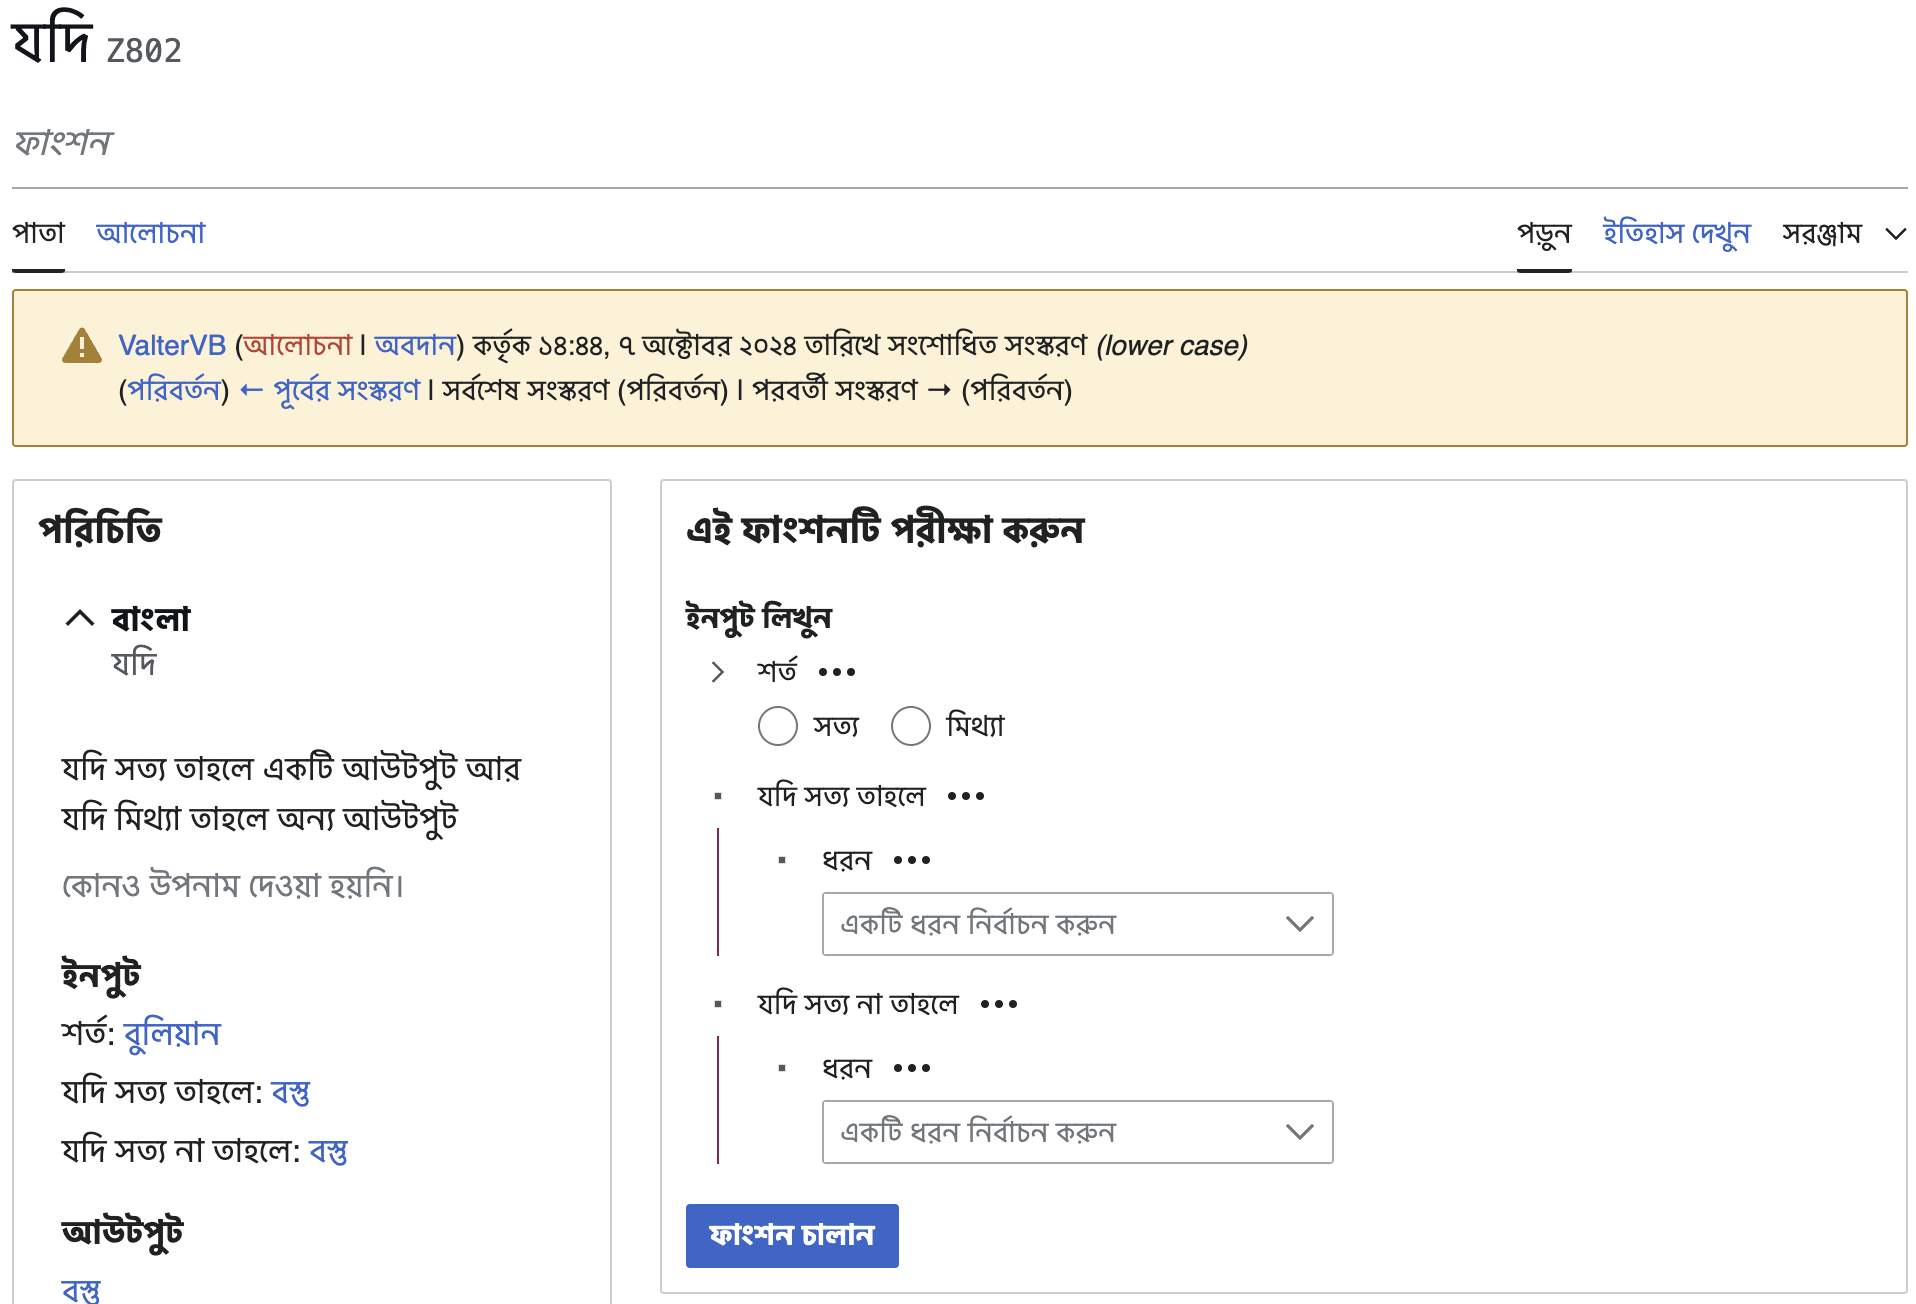{#fig-bangla-if }

In their response to the Google Fellows’ Evaluation, the Wikilambda developers spell out the political consequences of Anglocentric programming languages.

> A solution designed by a small group of Westerners is likely to produce a system that replicates the trends of an imperialist English-focused Western-thinking industry. Existing tools tell a one-voice story; they are built by the same people (in a socio-cultural sense) and produce the same outcome, which is crafted to the needs of their creators (or by the limits of their understanding). Tools are then used to build tools, which will be again used to build more tools; step by step, every level of architectural decision-making limits more and more the space that can be benefitted by these efforts. \[@blanton_abstract_2022\]

The Wikilambda developers echo common arguments of postcolonial theory. Language is not only a “means of communication,” but also a “carrier of culture” \[@wa_thiongo_decolonising_1986, p. 13\]. When a speaker of a local language is forced to adopt an imperial tongue such as English, it results in a kind of “colonial alienation”: in everyday life, the local speaker uses their mother tongue, but the language of learning and technology is the imperial tongue \[@wa_thiongo_decolonising_1986, p. 16\]. The imperial tongue may give access to new knowledge, but it also carries its own culture, and forces the local speaker to adopt the imperial point of view. The Wikilambda developers extend this argument into the world of software. Software is rooted in the English language, and so imposes Anglo-American culture on the world. This limits the “space” in which programmers can dream up new software. This is a problem in general, but also a problem specifically for Abstract Wikipedia, which will require new and highly innovative software to succeed. The necessary ideas may be lurking in the mind of a Gikuyu or Tok Pisin speaker, who hithterto could not express their ideas in any conventional programming language.

Wikifunctions is not the first programming system that contests the dominance of English. @marino_critical_2020 \[pp. 151-4\] describes several prior efforts. When Grace Murray Hopper designed FLOW-MATIC in the 1950s, she wrote it to run using English, French or German vocabulary. More recently, Ramsey Nasser has designed قلب (or ’alb), a variant of Scheme that runs right-to-left and uses Arabic characters, while in Hawai’i, the ’Anu’u project is translating C# into into Hawai’ian. @marino_critical_2020 \[pp. 132-33\] agrees with the Wikilambda developers that English vocabulary can have a “colonizing effect” on programmers.

Despite this, there is a problem at the heart of postcolonial language design. The fact is that “words in code simply do not behave the way they do in spoken or written language” \[@marino_critical_2020, p. 145-147\]. For example, the function `mapcar` in the Scheme programming language has nothing to do with either maps or cars. The `mapcar` function in fact *applies the passed operator to the first item of each list in a list of lists*. Similarly, many languages have a `print` function, which has nothing to do with printing, but instead causes text to appear on screen. This reflects a deeper point. It may be true that programming languages such as Python and Lua use English vocabulary, but Python and Lua are not, in fact, English. They are themselves languages, cherished by particular communities of programmers, with their own idioms and styles and values. It may be true that you need to learn English before you can learn Python or Lua, but this is not because of the English vocabulary of those languages. It is because most of the books and tutorials and documentation are in English, and the international community of programmers use English as a *lingua franca*. The tricky part of learning to program is *learning to program*. When do you need to use the `if` function? Being able to write `যদি` instead of `if` won’t help. What *would* help is a good book, teacher or documentation in your native language.

Wikilambda does provide facilities for multilingual documentation. Functions can be described in any language, and the visitor will automatically see the description in their own language. But it unlikely that Wikifunctions will ever free programmers from the dominance of English. First, it is likely that Wikifunctions’ discussion pages and policy documents will be dominated by English, as they are on Wikidata \[@ford_wikidata_2023\]. Second, the creators intend for the platform to mostly rely on “native language” implementations of functions in the database, by which they mean implementations in existing programming languages such as Python and JavaScript. Since these are the very languages whose Anglocentrism they decry, the Wikilamda’s teams critiques apply to their own system too.

### Functional literacy

As well as linguistic universality, the Wikilambda team also aim for a kind of programming universality. Their

Most languages invented to democratise programming have not been “purely functional,” but have been either imperative languages like BASIC and Scratch, or object-oriented languages like Smalltalk and Processing \[@vee_coding_2017; @blackwell_moral_2024\]. Imperative and object-oriented languages are good for beginners because they provide intuitive metaphors. Imperative languages allow you to command the computer to do things. Object-oriented languages allow you to simulate the real world by defining “objects” that represent actual entities. In both the imperative and object-oriented cases, democratic languages have typically focussed on highly aesthetic aspects of programming, such as drawing graphics, manipulating text, or controlling robots \[@montfort_10_2013\]. In such aesthetic situations, the beginning programmer can literally see, hear, or feel the effects of their code. This multisensory experience provides both feedback and encouragement to the learner.

Purely functional languages present programmers with a highly abstract metaphor for the computer. Rather than commanding the computer to do things, or simulating a world of familiar objects, the functional programmer defines individual mathematical functions, and then “composes” them into complex wholes \[@hudak_conception_1989\]. While it is possible to teach purely functional programming in an aesthetic context \[e.g. @hudak_haskell_2000\], most functional languages designed for beginners have not been *purely* functional languages. Examples include LOGO and Racket, both of which are “functional” in a broad sense, but are *im*pure because they allow “side-effects,” and thus can support the more familiar imperative and object-oriented styles of programming.

The Wikilambda is *purely* functional for technical reasons, but the Wikilambda team have nonetheless made a universalist case for this aspect of the language. As the Wikilambda team explain, function “purity” is essential if you want to store functions in a database, and execute them individually on demand; since “pure” functions *only* depend upon the inputs that are given to them, they have the useful property of “determinism” \[@noauthor_wikifunctionsdeterminism_2024\]. In their evaluation of the system, the Google Fellows do not dispute this, but raise a different objection: programming with pure functions is “less intuitive for the average programmer,” and would be especially inappropriate for the kind of software needed for Abstract Wikipedia \[@livneh_abstract_2022\]. How can this system be universal and inclusive if it uses a counter-intuitive and inappropriate programming paradigm?

The Wikilambda team’s rebuttal is striking. Functional programming is only hard because programmers have “already absorbed the imperative programming paradigm” from their education. “For people who have no prior relationship with programming, a functional paradigm might be as intuitive as an imperative one, if not more so.” \[@blanton_abstract_2022\] This argument is hard to credit from a commonsense perspective. If purely functional programming is so intuitive, why have computer literacy advocates never adopted it before? From an ideological perspective, the argument is more interesting. By establishing a brand-new language in an unusual paradigm, the Wikilambda team imply, Wikilambda will sweep away existing inequalities of skill and knowledge. In this new world, everyone will be a beginner. The dominant “imperative” paradigm will go the same way as the dominant “English” language.

### *The Lord of the Rings*

Twice in there response to the Google Fellows, the Wikilambda team use a nerdy metaphor. The Wikilamdba team do not want a “One Ring solution” \[@blanton_abstract_2022\]. Instead, they want to allow contributors to experiment with many solutions. The “One Ring” is of course the ring of power forged by the villanous Sauron in J.R.R. Tolkein’s *The Lord of the Rings* (*LOTR*). The influence of *LOTR* has been immense in the history of computing. In the early days of the internet, there were so many computers called “Frodo” that *LOTR* became a vivid illustration of the need for a domain name system \[@abbate_inventing_1999\]. *LOTR* remains one of the most-read and discussed books among software engineers \[@dillon_what_2023\].

The Wikilambda team position themselves as a band of hobbits opposing the mighty Saurons of Big Tech and the English language. But in their choice of reference, they unwittingly reveal a contradiction at the heart of their universalist credo. Wikilambda *is* a “One Ring solution.” It is a single, global, unified programming system, that will encompass potentially all languages. *LOTR* itself is the opposite of Wikilambda. It depicts a world of extreme linguistic and ethnic diversity. As is well known, Tolkien wrote the book by first inventing several fictional languages, and then writing fictional histories to explain the development and diversification of these languages. By contrast, Wikilambda is a single language that attempts to unite many diverse ones. To resolve this contradiction, the Wikilambda team make a paradoxical argument for its perfection. This language is so simple that it is in fact no language at all.

## Perfection: the language that is not a language

> But it is perhaps nothing more than our ‘democratic’ illusion to imagine that perfection must imply universality. \[@eco_search_1995, p. 190\]

What would it mean for a programming language to be ‘perfect’? The perfect languages surveyed by @eco_search_1995 attempt to align their vocabulary and syntax with nature. The vocabulary of a perfect language should include exactly one word for each natural kind. The grammar of a perfect language should all the speaker or writer to combine these words in exactly the way that these natural kinds are combined in nature. The language itself ought to be a mirror of the world, such that any fact about the world can be expressed concisely and unambiguously. Of course the whole project relies on the idea that there are a finite set of natural kinds, and that the rules for their combination are known.

Programming languages are obviously more limited than natural languages, because they exist for a specific purpose. A programming language is designed to program a computer. Thus to be perfect, a programming language only needs one word for each natural kind *of computation*, and grammatical rules that allow these natural kinds to be combined *as a computer is able to combine things*. What are the natural kinds of computation? What are the primitive elements of all computer programs, and what are the ways they can be combined? In this section, I try to see how Wikilambda answers these questions, by comparing its language to Scheme, a language developed by AI researchers in the 1970s that resembles the Wikilambda language in crucial respects.

There have been many attempts to answer these questions, and to create a universally valid model of computation. The two most famous attempts are Alan Turing’s universal machine \[-@turing_computable_1936\], and Alonzo Church’s λ-calculus \[-@church_set_1932\]. The “universality” of Turing’s machine is different to the “universality” discussed above in @sec-universality. Turing’s machine is “universal” because it is theoretically able to perform any computation. Church’s λ-calculus has the same property \[@turing_computability_1937\]. Wikilambda invokes Turing and Church to stake its own claim for perfection. The software is named after Church’s λ-calculus. The Wikifunctions database incorporates a stylized lambda into its logo (@fig-wikifunctions-logo). The Google Fellows report that “Turing-completeness” is an explicit requirement of the system \[@livneh_abstract_2022\], though it is Church’s λ-calculus that has more directly inspired the design of the Wikilambda language.

![The Wikifunctions logo, incorporating lambda. Based upon the submissions of NGC 54, Jon Harald Søby and Stevenliuyi. [CC BY-SA 4.0.](https://commons.wikimedia.org/w/index.php?curid=112952316)](attachment:img/Wikifunctions-logo.svg){#fig-wikifunctions-logo }

### Wikilambda’s claim to perfection

The Wikilambda team do not simply claim that their language is Turing-complete. Many languages are Turing-complete, including deliberately unusable languages like Brainfuck \[@mateas_box_2005\], and languages not intended for programming, such as the typesetting system TeX. Indeed, philosophers have debated whether there is *any* physical object which is *not* Turing-complete \[@chalmers_does_1996\]. The Wikilambda team make a stronger claim than Turing-completeness. Not only is their language able to express any computation, but its syntax mimics the natural form of computation itself: “… we do not really think of function composition as a new programming language, but rather as an abstract syntax tree to compose function calls together …” \[@blanton_abstract_2022\]. Taken at its strongest, this statement implies that the Wikilambda language is perfect. Conventional programming languages are parsed into “abstract syntax trees,” which are then converted into machine code. Wikilambda strips away everything on top of the abstract syntax tree, giving the user direct access to the program as the computer sees it. It is not really a “language,” because it is immediate. Nothing stands between the programmer and the actual structure of their program. When the user manipulates this language, they manipulate the abstract syntax tree itself.

The Wikilambda team make this case with considerable uncertainty, and hedge their arguments. They wonder whether the difference between a “language” and an “abstract syntax tree” is merely “terminological,” and then ironise their argument with an emoticon: “… the function model in the ZObject system merely allows nesting function calls and express\[ing\] data. How hard can that be? ;)” \[@blanton_abstract_2022\]. On the page “What Wikifunctions is Not,” they insist again that this is “Not a Programming Language,” stressing that Wikilambda’s function composition “will be extremely limited compared to most other programming languages, since we only allow for nested function calls and that’s it.” \[@noauthor_wikifunctionswhat_2024\] Elsewhere they do, however, admit that they are involved in a tricky process of language design. In the README for the “function orchestrator,” they admit that “the orchestrator kind of implements a functional programming language,” and apologise for the resulting “complexity” of the code \[@massaro_function_2024\]. This uncertainty in the documentation suggests that the Wikilambda team are unsure what exactly they are making. Are they “kind of” making a very “limited” language that “merely” or “only” allows nesting of functions? Or is that just an empty “terminological” question?

In fact the Wikilambda language is not an “abstract syntax tree,” and there is nothing “mere” or “limited” about it. The supposed “limitations” of the language are actually deliberate decisions about what features to implement within it. Comparing the Wikilambda language with Scheme reveals some of these important decisions.

### Wikilambda and Scheme compared

Scheme is an influential dialect of the LISP programming language. The Wikilambda team also consider their language to be a dialect of LISP: “If there was a TLDR of the project it would probably be ‘something like LISP in JSON’.” \[@noauthor_wikifunctionsfunction_2024\] Like Scheme, the Wikilambda language is very simple. In this simplicity, Scheme and Wikilambda differ from other dialects of LISP, such as Common LISP and Clojure, which include additional features to support common programming tasks \[@bergin_evolution_1996; @hickey_history_2020\].

The inventors of Scheme present it as an extension of the λ-calculus , and claim a certain kind of perfection for the language. Scheme extends the λ-calculus with just enough features to make it “convenient,” while retaining the power of the λ-calculus to represent the inner structure of a computation. Thus Scheme is not merely a programming language, but a powerful “meta-language” that can be used to study the nature of computation itself \[@sussman_scheme_1975; @steele_jr_lambda_1976\]. In a series of famous memos, known as the “Lambda Papers,” Scheme’s creators show how the language can easily simulate many different programming paradigms, including continuation-passing, message-passing, imperative and structured programming \[@steele_jr_lambda_1976-1; @steele_jr_lambda_1976; @steele_jr_debunking_1977\]. Thus Scheme’s perfection is twofold: it exposes the fundamentals of computation by resembling the λ-calculus, while also having the ability to morph into many other programming languages.

The Wikilamba language is even simpler than Scheme. This simplicity has led its creators into some difficult design choices. We can see the crucial differences by comparing a short program in each language. I have chosen the factorial function, a simple function often used to demonstrate recursive programming to beginners. In mathematical notation, “factorial of n” is written $n!$. To compute the factorial of a number, you multiply all the natural numbers up to $n$. For example, to compute the factorial of 6:

It is possible to describe the factorial function using two simple rules, which can then be used to implement it in a programming language. To find these two rules, we first observe a pattern in the function:

From this, we can derive the first rule

$$n! = n \times (n - 1)!$$

This is a “recursive” rule, because the factorial function is defined in terms of itself. The factorial of $n$ is equal to *the factorial* of $(n - 1)$ multiplied by $n$ itself. This recursion could go on forever, so we need a second rule to stop subtracting $1$ from $n$. The required rule is simple: $0! = 1$. When $n$ is equal to $0$ we stop subtracting $1$, and we can multiply all the terms together to get the final answer.[6]

@lst-scheme-factorial shows how to write the factorial function in Scheme, using these two rules.

``` code-annotation-code
(define (factorial n)
  (if (= n 0) ; condition
      1       ; consequent
      (* n (factorial (- n 1))))) ; alternative
```

On line 1, we `define` a new function called `factorial`, which takes one input, called `n`. On line 2, we decide which rule to apply. If `n` is equal to zero, then the first option will be chosen (the *consequent*), and the function will simply output the value `1`. If `n` is equal to any other number, then the second option will be chosen (the *alternative*). In this case, `n` will be multiplied by the output of the factorial function applied to `n - 1`. In Scheme, as in many programming languages, `*` is the multiplication symbol. Thus the expression `(* n (factorial (- n 1)))` is exactly equivalent to $n \times (n - 1)!$.

@lst-wikilambda-factorial is the current Wikilambda implementation of the factorial function in the Wikifunctions database \[@noauthor_factorial_2024\]. This is its representation in “canonical form,” which is the format used within the system to represent Wikilambda code. Users are not exposed to the code directly. Instead, they see a visual representation of the code, with the various `Z`-codes translated into their preferred language (@fig-wikilambda-factorial).

``` r
factorial_zid <- "Z13863"
revision_id <- "101571" # Revision at time of writing
wikilambda_factorial <- httr2::request("https://www.wikifunctions.org/w/api.php") |> 
  httr2::req_url_query(
    action = "wikilambda_fetch",
    zids = factorial_zid,
    language = "en",
    revid = revision_id,
    format = "json"
  ) |> 
  httr2::req_perform() |> 
  httr2::resp_body_json() |>  
  purrr::pluck(factorial_zid, "wikilambda_fetch")
# Create the code block. Using `results: asis` inserts the output as raw text
# into the markdown document, allowing us to use quarto's formatting features.
cat(
  "```{#lst-wikilambda-factorial .json lst-cap='A recursive implementation of factorial in Wikilambda'}\n",
  wikilambda_factorial[[1]],
  "\n```")
```

     {
        "Z1K1": "Z2",
        "Z2K1": {
            "Z1K1": "Z6",
            "Z6K1": "Z13863"
        },
        "Z2K2": {
            "Z1K1": "Z14",
            "Z14K1": "Z13667",
            "Z14K2": {
                "Z1K1": "Z7",
                "Z7K1": "Z802",
                "Z802K1": {
                    "Z1K1": "Z7",
                    "Z7K1": "Z13522",
                    "Z13522K1": {
                        "Z1K1": "Z18",
                        "Z18K1": "Z13667K1"
                    },
                    "Z13522K2": {
                        "Z1K1": "Z13518",
                        "Z13518K1": "0"
                    }
                },
                "Z802K2": {
                    "Z1K1": "Z7",
                    "Z7K1": "Z13636",
                    "Z13636K1": {
                        "Z1K1": "Z13518",
                        "Z13518K1": "1"
                    }
                },
                "Z802K3": {
                    "Z1K1": "Z7",
                    "Z7K1": "Z13539",
                    "Z13539K1": {
                        "Z1K1": "Z18",
                        "Z18K1": "Z13667K1"
                    },
                    "Z13539K2": {
                        "Z1K1": "Z7",
                        "Z7K1": "Z13667",
                        "Z13667K1": {
                            "Z1K1": "Z7",
                            "Z7K1": "Z13582",
                            "Z13582K1": {
                                "Z1K1": "Z13518",
                                "Z13518K1": {
                                    "Z1K1": "Z18",
                                    "Z18K1": "Z13667K1"
                                }
                            }
                        }
                    }
                }
            }
        },
        "Z2K3": {
            "Z1K1": "Z12",
            "Z12K1": [
                "Z11",
                {
                    "Z1K1": "Z11",
                    "Z11K1": "Z1002",
                    "Z11K2": "factorial, composition"
                }
            ]
        },
        "Z2K4": {
            "Z1K1": "Z32",
            "Z32K1": [
                "Z31"
            ]
        },
        "Z2K5": {
            "Z1K1": "Z12",
            "Z12K1": [
                "Z11"
            ]
        }
    } 

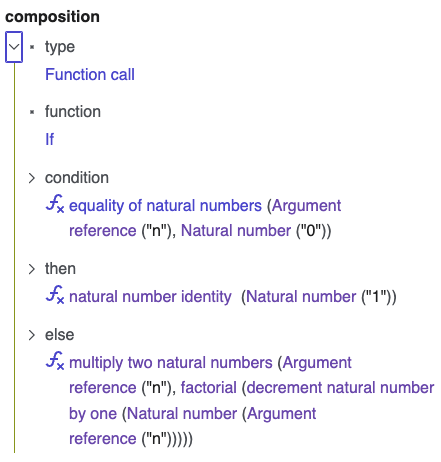{#fig-wikilambda-factorial }

The Wikilambda code is extremely verbose, partly because of the extreme simplicity of the language. In what follows, I analyse selected lines of @lst-wikilambda-factorial to illustrate some similarities and differences with @lst-scheme-factorial.

The first crucial similarity is that both Scheme and Wikilambda use prefix notation.[7] Ordinary mathematical notation uses *in*fix notation, with optional parentheses. Consider the expression $3 + 2 \times 4$. The $+$ and $\times$ symbols go *in between* the numerals, and are therefore *in*fixes. Parentheses are optional because there is a rule that tells us to perform the multiplication before the addition. There is no need to write $3 + (2 \times 4)$. In both Scheme and Wikilambda, the mathematical operator goes *before* the numerals, and parentheses are compulsory. Here is the multiplication in @lst-wikilambda-factorial:

``` json
{
  "Z1K1": "Z7",
  "Z7K1": "Z13539",
  "Z13539K1": { ... },
  "Z13539K2": { ... }
}
```

Line 2  
A [Z7](https://www.wikifunctions.org/wiki/Z7) is a “Function Call.” The next few lines will tell Wikilambda which function to “call,” and what its inputs are.

Line 3  
First comes the function. [Z13539](https://www.wikifunctions.org/wiki/Z13539) is the function “multiply two natural numbers.”

Line 4  
Next comes the first number, also called the “multiplicand.” The label has two parts, “Z13539,” referring to the multiplication function, and “K1,” meaning “the first input.”

Line 5  
Finally comes the second number, also called the “multiplier.” The label again has two parts, “Z13539” for the function, and “K2” for “second input.”

Line 6  
The expression is fully parenthised. Because Wikilamdba uses JSON as its file format, it uses curly braces `{}` rather than the traditional parentheses `()`.

This excerpt is far more verbose than the equivalent section of @lst-scheme-factorial:

``` scheme
(* ... ...)
```

The verbosity is due to Wikilambda’s extreme simplicity. Scheme has some rudimentary syntactical rules that are absent from Wikilamda. For example, in Wikilambda, the multiplication is explicitly labelled as a [Z7:Function Call](https://www.wikifunctions.org/wiki/Z7), so that the system knows that the user intends to call a function. In Scheme, there is no need to label the expression as a function call: it is simply assumed that the first symbol in the parentheses is a function, which will be applied to whatever symbols come after it. In Wikilambda, each part of the expression is explicitly labelled. We can see from the labels which is the first input (“K1”) and which is the second input (“K2”) to the function. In Scheme, this labelling is handled by the programming system. The writer of code can simply write the two inputs to the function, and the Scheme interpreter will do the work of labelling them as “input 1” and “input 2.”

This explicit labelling does justify the idea that programming Wikilambda allows users to directly manipulate the “abstract syntax tree.” Work that is usually done by the program interpreting the code is instead being done by the human programmer. The labelling also means that the order of parts of the program is strictly speaking irrelevant. Although the code is presented in prefix notation, with the function first and it inputs in their proper order second, the function orchestrator actually uses the provided labels to determine what the function and its inputs are. It would still evaluate the code correctly if the lines were jumbled up. In Scheme, however, the interpreter relies on the symbols being in their proper order.

There are many other differences between Scheme and Wikilambda, but one further contrast will serve to illustrate the tricky problems of language design faced by the Wikilambda programmers. The crucial contrast lies in the `if` function, which enables the factorial function to be recursive. Recall that `if` is necessary in order to select which rule to apply: `if` $n = 0$, one rule applies, else the other applies.

``` json
{
  "Z1K1": "Z7",
  "Z7K1": "Z802",
  "Z802K1": { ... },
  "Z802K2": { ... },
  "Z802K3": { ... }
}
```

Lines 2-3  
This is the most important aspect of this expression: the “If” function ([Z802](https://www.wikifunctions.org/wiki/Z802)) is just an ordinary function like any other, invoked by a “Function Call” ([Z7](https://www.wikifunctions.org/wiki/Z7)). As we will see, when the Wikilambda team opted to treat all control strcutres as simple functions, they obliged themselves to implement “lazy evaluation,” which has significant consequences for the entire system \[@noauthor_wikifunctionsfunction_2024; @noauthor_abstract_2024\].

Line 4  
The first input (“K1”) is the *condition*. In @lst-wikilambda-factorial, the condition checks whether $n = 0$.

Line 5  
The second input (“K2”) is the *consequent* or *then* expression: what the function will do if the “condition” is true.

Line 6  
The third input (“K3”) is the *alternative* or *else* expression: what the function will do if the “condition” is false.

To understand the need for “lazy evaluation” in Wikilambda, we can again contrast it with Scheme. In Scheme, `if` is not a normal function, but rather a “special form” which behaves differently to an ordinary function. When an ordinary function is called in Scheme, all its inputs are evaluated before the function is then applied to them. This is called “applicative order” evaluation. For example, imagine we wanted to calculate

$$(3 + 1) \times (4 \div 2)$$

In Scheme, that is written:

``` scheme
(* (+ 3 1) (/ 4 2))
```

We start at `*`, the multiplication operator. Before we apply this operator, we first “evaluate the inputs,” which means “calculate `(+ 3 1)` and `(/ 4 2)`”. Then the expression becomes:

``` scheme
(* 4 2)
```

Once the values of the inputs are known, we perform the multiplication:

``` scheme
8
```

Now imagine that we wanted to calculate $1!$. To calculate $1!$ using the code in @lst-scheme-factorial, we write:

``` scheme
(factorial 1)
```

This becomes

``` scheme
(if (= 1 0)
    1
    (* 1 (factorial (- 1 1))))
```

Now, if we follow the usual rule of applicative order evaluation, before we can apply the `if` function, we need to evaluate all its inputs. The function has three inputs, namely the *condition*, the *consequent* and the *alternative*. Let us evaluate them.

``` scheme
(if #f
    1
    (* 1 (factorial 0)))
```

Line 1  
It is false (`#f`) that `n` is equal to `1`.

Line 2  
The value of `1` is one. Evaluating this expression is trivial.

Line 3  
This is a complex expression. Before we can apply the `*`, we need to evaluate its two inputs. The first input is simply `1`. The second input, `(factorial (- 1 1))` evaluates to `(factorial 0)`.

We still haven’t fully evaluated the inputs to `if`, so now we need to evaluate `(factorial 0)`. Then we will be able to multiply it by `1` to finish evaluating that last line of the code. `(factorial 0)` becomes:

``` scheme
(if (= 0 0) ; evaluates to #t, "true"
    1       ; evaluates to 1
    (* 0 (factorial (- 0 1)))
```

Ah, we have another complex expression, `(factorial (- 0 1))`. Before we can apply `if` to its three inputs, we need to work out the value of `(factorial (- 0 1))`, which is of course `(factorial -1)`. Before we can evaluate that, we need to work out the value of `(factorial (- -1 1))`, which is of course `(factorial -2)`, and so on. Our code is broken. It will never stop subtracting $1$ from $n$, and will never return us an answer.

The solution in Scheme is to treat `if` as a “special form.” When we call an ordinary function in Scheme, all the inputs are evaluated straight away. But when we use `if`, only the *condition* is evaluated. Then, depending on the outcome of that, *either* the consequent *or* the alternative is evaluated. Thus in fact the Scheme code does work. When we reach `(factorial 0)`, the following will happen:

``` scheme
; first step
(if (= 0 0)
    1 ; ignore
    (* 0 (factorial (- 0 1)))) ; ignore

; second step
(if #t
    1
    (* 0 (factorial (- 0 1))))

; final answer    
1
```

Line 2  
First evaluate the condition.

Line 7  
It is true (`#t`).

Line 8  
Therefore evaluate the *consequent*.

Line 9  
We ignore the *alternative*, and don’t try to evaluate `(factorial -1)`.

Line 12  
The output is `1`.

@sussman_scheme_1975 \[p. 26\] argue that any “practical lambda calculus interpreter” must include a mixture of applicative-order functions like `*`, whose inputs are evaluated straightaway, and “lazy” or “normal-order” functions like `if`, whose inputs are only evaluated when needed. Aside from `if`, Scheme provides several other “special forms” to support essential programming constructs \[@noauthor_special_1997\].

Instead of providing “special forms” to users, Wikilambda works throughout like Scheme’s `if`. All Wikilambda functions are “lazily evaluated.” The inputs to a function are only ever evaluated when they are used inside the function. And crucially, each expression is evaluated only once. If, for example, Wikilambda has to calculate the value of $4 + 2$, it will remember that the answer is $6$, and simply fetch the answer from memory if it sees $4 + 2$ again. In fact there are no “special forms” at all in Wikilambda, except for some “built-in” functions that are currently unavailable to end-users, and the “Quote” type ([Z99](https://www.wikifunctions.org/view/en/Z99)). Not only does Wikilambda adopt lazy evaluation, but it provides no convenient way to avoid it, even when it may be convenient to do so.

By adopting lazy evaluation, Wikilambda sharply departs from other dialects of LISP, which are generally applicative order languages like Scheme. There are many known advantages to lazy evaluation. It can increase the modularity of code, and enable the use of “infinite” data structures \[@hudak_conception_1989, p. 385\]. But very few mainstream languages use it as the default evaluation strategy, because it is difficult for language designers to implement efficiently and correctly. The most famous lazily evaluated language is Haskell, which is in many respects the opposite of Scheme or Wikilambda. Rather than a small, simple language designed to give direct access to the abstract syntax tree, it is a complex language with many syntactic rules and a powerful “optimising” compiler that transforms the code into performant software. By adopting lazy evaluation, Wikilambda seems to be heading in two directions at once: towards the simplicity of Scheme, and the complexity of high-tech functional languages like Haskell.

In fact, Scheme itself is not so simple. Aside from “special forms,” Scheme implements many additional features, such as tail-call optimisation, garbage collection, pattern matching and an object system, which make Scheme’s simple syntax useable in practice. Its surface simplicity is the result of a lot of careful software engineering under the hood. The source code for MIT/GNU Scheme, one of the major Scheme implementations, is nearly 1.4 million lines long. By contrast, the “function orchestrator” is a little over 5400 lines.[8] The function orchestrator is written in a “natural and intuitive” style, to quote the polite phrasing of the Google Fellows. By “natural and intuitive,” they appear to mean *simple and naive*, and they go on to suggest that the system needs to be re-written to cope with serious computations \[@noauthor_abstract_2024\]. The Wikilambda team rest their hopes on two factors. First, that functions in the Wikifunctions database will mostly be implemented in existing languages that manage performance and memory issues; and second, that results from calling Wikifunctions will be cached, so that the system can rapidly return pre-saved answers as often as possible. In both these cases, the function orchestrator and its new language would have little to do. The unnamed Wikilambda language, the glue between implementations, the shaker of Anglocentrism, the language that is not a language, the pure expression of the abstract syntax tree, is both the keystone and the vanishing point of the system.

## Code: a most perfect and universal hack

> Through the production of new forms of abstraction, the hacker class produces the possibility of the future. \[@wark_hacker_2004, §077\]

> Dear reader, if you have solved similar problems–e.g., if you implemented programming languages before–and know the better way, have at it :). \["README", @massaro_function_2024\]

What makes the function orchestrator so “natural and intuitive”? What is the “nature” it reflects? What are the “intuitions” it appeals to? Critical Code Studies is still a young field, and scholars are still developing the critical procedures to answer such questions. In this section, I draw inspiration from *The Structure and Interpretation of Computer Programs* \[@sussman_structure_1996\]. In SICP, the authors describe how programmers build up “abstractions” that allow them to describe the problem domain of their software. The key question in program design is where to place the “abstraction barriers.” From a literary perspective, an abstraction barrier is a layer of metaphor. The metaphors in an abstraction layer allow the programmer to describe elements of the program as though they are things and processes in the real world. They can ignore the concrete elements below the layer of metaphor (e.g. electrons whizzing about in the CPU) and focus on metaphorical objects above the layer (e.g. with `ZObjects` in the Wikifunctions database). In this section, I consider some of the metaphors that structure the code of the function orchestrator. The “naturalness” and “intuitiveness” of these metaphors vividly communicate the underlying ideals of the Wikilambda language.

To illustrate the metaphorical nature of code, I begin with a short example from the “function evalutor,” an even simpler piece of software than the “function orchestrator.” The role of the function evaluator is to run implementations in the Wikifunctions database. It does so by maintaining an `ExecutorPool`. Executors are little pieces of software than can run particular code: if a function in Wikifunctions is implemented in Python, it will be executed by a Python executor; if it is implemented in JavaScript, by a JavaScript executor, and so on.

The Wikilambda developers clearly enjoyed themselves when they wrote the code that empties the `ExecutorPool` at the end of a session. To empty the `ExecutorPool`, the programmer needs to `drainTheSwamp`. When they drain the swamp, the program creates a `hitList` of executors in the pool, and then uses `killExecutors` to delete them all. The metaphor becomes gentler in the next phase of the process. To “kill” an individual executor, the program calls on the executor to use its own `immaHeadOut` method, which offers the suicidal executor a dignified exit (@lst-immaHeadOut). The executor destroys the `childProcess` it has been using to execute code, and then posts an `obituary_` so the rest of the program knows it has done so.

    async immaHeadOut() {
      // Kill the executor child process if it has survived.
      if ( this.childProcess_ !== null && !this.childProcess_.killed ) {
        await killProcessFamily( this.childProcess_.pid );
      }

      // Announce the death of the child.
      this.obituary_();
    }

Pool, swamp, hitman, netspeak, funeral—the Wikilambda software is written with a mixture of bruality and tenderness that bespeaks the passion of its programmers. There is nothing clinical or professional about code that riffs on Trumpian rhetoric and mourns the euthanasia of children. This is vivid code, full of metaphors that the Wikilambda developers use to communicate with one another. Wikilambda’s “function evaluator” is a simple program, which performs tasks familiar to any web developer. The “function orchestrator” is a much more complex and unusual piece of software, which the Wikilambda developers admit they do not fully understand themselves. Its metaphors are accordingly more vital to the project, and less confident in their application, than those of the gleeful “evaluator.”

### First metaphor: the orchestra

The entire function orchestrator is built around a central metaphor: orchestration. When a “parser function request” arrives at Wikifunctions (@fig-wikilambda-architecture), a piece of Wikilambda code such as @lst-wikilambda-factorial is retrieved from the database, and sent to the function orchestrator. The function orchestrator calls the `orchestrate` function on the code, and the process begins.

This metaphor is unusual. There is no `orchestrate` function in major implementations of Python, JavaScript and Scheme, though the word sometimes crops up in documentation.[9] All these languages use the metaphor of “interpretation.” Indeed, the function orchestrator contains an “interpreter” in the usual computer-programming sense of the word. The function orchestrator stands between the raw Wikilambda code (e.g. @lst-wikilambda-factorial) and the machine, which understands only the machine language hard-coded into its CPU. The function orchestrator interprets the code so that the machine can understand it.

Why depart from the dominant metaphor, and call this an “orchestrator”? The metaphor probably reflects the Wikilambda developers’ reluctance to view Wikilambda as a programming language. An “interpreter” is a translator, who works with words. An “orchestrator” is a composer, who fleshes out a musical composition by assigning parts to the instruments of an orchestra. It is hard to know how literally to take this metaphor, but it does certainly harmonise with the notion of “function composition.” In this extended metaphor, the contributor to Wikifunctions is the original composer, who creates the spine of the function, and then Wikilambda realises the composition by adding in the orchestration.

@lst-orchestrate-callTuples indicates what the activity of “orchestration” is like. In this extract from the `orchestrate` function, the function creates a to-do list for itself (called `callTuples`). This to-do list contains four tasks:

1.  `normalize` the Wikilambda code it has received (this lightly reformats the code, as explained in the “Normal Form” section of @noauthor_wikifunctionsfunction_2024);
2.  check that the code is a `Z7`, a function call, otherwise raise an `Error`;
3.  `make` a `WrappedResultEnvelope` to contain the final output of the computation; then
4.  `execute` the actual function contained in the Wikilambda code.

<!-- -->

    const callTuples = [
        [ normalize, [ /* generically= */true, /* withVoid= */ true ], 'normalize' ],
        [ Z7OrError, [], 'Z7OrError' ],
        [ makeWrappedResultEnvelope, [], 'wrapAsZObject' ],
        [
            execute, [
                invariants, /* doValidate= */invariants.orchestratorConfig.doValidate,
                /* implementationSelector= */implementationSelector,
                /* resolveInternals= */true, /* topLevel= */true ],
            'execute'
        ]
    ];

It is at step 4 that the orchestration metaphor becomes most vivid. The `implementationSelector` is the key parameter. This parameter tells the `execute` function how to choose an implementation of any functions that are invoked by the Wikilambda code. For example, function [Z13539](https://www.wikifunctions.org/wiki/Z13539) (“multiply two natural numbers”) has five implementations at the time of writing: three “composition” implementations in the Wikilambda language, one Python implementation and one JavaScript implementation. If the `execute` function encounters [Z13539](https://www.wikifunctions.org/wiki/Z13539), for instance when calculating a factorial, which implementation should it use? Eventually the Wikilambda team intend to apply a clever `implementationSelector` algorithm that selects the fastest and most reliable implementation. At the moment, the only two algorithms supported by the system are: 1. use the first implementation, or 2. use a random one. By determining the `implementationSelector` algorithm, the `orchestrate` function decides how to marshall the resources of the Wikifunctions database. Like the orchestrator who allocates some parts to the strings and others to the winds, the `orchestrate` function decides how to allocate parts between the Python executor, JavaScript executor, any future executors, and itself.

This metaphor vividly communicates the role of the Wikilambda language as the glue of a large and complex system. This is not an ordinary language, which programmers use to write discrete applications for particular machines. Wikilambda is not an interpreter or compiler, that boils source code down into a lean sequence of machine- or bytecode instructions. Wikilambda is the first distributed online language. It conducts an orchestra of server-racks, in accordance with the score of the contributor-composer.

### Second metaphor: wrappers and envelopes

The most prominent metaphors in the code otherwise are metaphors *for abstraction itself*. To understand this point, it is necessary first to understand JavaScript objects, which are the main tool that the Wikilambda developers use to introduce abstractions into their code.

To create an abstraction in JavaScript, you can define a new “class” of “object.” For example, if you are running an online marketplace, you might define a `Customer` class to represent customers, and a `Merchant` class to represent merchants in your marketplace. These are abstractions, because they allow you to treat all `Customers` and all `Merchants` the same, even if they are different under the hood. For example, perhaps some `Merchants` in your system are humans, and others are corporations, and these different kinds of `Merchant` have different data associated with them, different access protocols, and so on. Inside the `Merchant` class, you would write code that handles these differences. This means that other parts of your program can safely ignore the differences between human and corporate `Merchants`. For example, the `Merchant` class might have a `name` method that tells you the name of the `Merchant`. If you ever need the name, for instance, to generate the title on a seller page, you can simply write `merchant.name()` to retrieve it.[10] For a human merchant, the first name and surname will be correctly combined. For a corporate merchant, the preferred brand name will be returned. Thus we have successfully “abstracted away” the difference between human and corporate merchants. We can write simpler code in which there is just one kind of `Merchant` we have to worry about.

The most important class in the orchestrator code is the `ZWrapper`. The `ZWrapper` class has a complex task. During a function orchestration, a tree of `ZWrappers` grows. Each time a new function is added to the tree, a `ZWrapper` is created to store information about that function and its “scope.” Scope is a tricky topic, but basically it prevents name clashes in the code. Imagine that you use a function that peforms five multiplications, for example. In this case, there will be five things called `multiplier` and five things called `multiplicand`. The `ZWrapper` class ensures that the correct `multipliers` and `multiplicands` are paired with one another in the right place.

The name of the `ZWrapper` class is interesting, because `Wrapper` is a synonym for “abstraction.” In their comments to the code, the developers frequently use the term “wrap” in this sense, e.g. the `ReferenceResolver` class “wraps MediaWiki” and the `Evaluator` class “\[w\]raps API calls to the function-evaluator service” \["src/invariants.js," "src/Evalutor.js", @massaro_function_2024\]. They also frequently use “wrap” and its morphemes in the names of functions and variables, e.g. `wrappedResult`, `wrapInZ6`, `wrapInQuote`, `makeWrappedResultEnvelope` \["src/builtins.js," "src/execute.js", @massaro_function_2024\]. In all these cases, the “wrapping” operation conceals the original item, giving it a new and hopefully more useable exterior. This is the very process of abstraction, in its rawest form. What does a `ZWrapper` wrap? A `ZObject`, which is more-or-less the thing portrayed in @lst-wikilambda-factorial. It is a JavaScript object extracted from the Wikifunctions database, identified by a Z-code such as [Z13667](https://www.wikifunctions.org/wiki/Z13667). Thus a `ZWrapper` is a kind of JavaScript object that “wraps” another kind of JavaScript object called `ZObject`. It may as well be called `ZMetaphor` or `ZAbstraction` or `ZObjectObject`.

This vocabulary dramatises the Wikilambda team’s struggle to create new abstractions. A `Wrapper` that wraps some `Object` is barely an abstraction at all. What makes this `ZObject` special? What does the act of “wrapping” it achieve? If I create `Merchant` and `Customer` classes in my online marketplace code, I enable myself to write code that actually describes the customers and merchants in the real world of my marketplace. What exactly do `ZWrappers` and `ZObjects` allow me to describe? The Wikilambda team are still evolving the metaphors they need. As they gain a deeper understanding of the software, the `ZWrapper` will likely dissolve into a cluster of better-labelled and more clearly specified software components.

Another case is presented by the term `envelope`. Throughout the code, the developers use the term `envelope` to refer to an “Evaluation Result,” that is, the output of a function that has been executed. Despite this consistent usage of the term, there is no `Envelope` class, although an `envelope` can be placed in a `ZEnvelopeWrapper` when it needs to be interpreted. In this case, there is already an available abstraction, but the developers decline to use it. Why not refer to results as `results`? Or as [Z22](https://www.wikifunctions.org/wiki/Z22)s? In this case, instead of referring to a part of the code using an available metaphor, they refer concretely to the way the result is “enveloped” in a JavaScript object. This is not a failure to abstract, but rather a decision to concretise.

Other parts of the code are more abstract. These more abstract parts of the code fall into two groups. There is the group of simple abstractions: `BaseFrame`, `Invariants`, `RateLimitCache` and `ArgumentState` all represent simple pieces of data or functionality that are relatively easy to implement. The other group of strong abstractions concern Wikimedia databases. The `Implementation` class represents function implementations in the Wikifunctions database. The `Evaluator` class represents the function evaluator service (@fig-wikilambda-architecture). The `ReferenceResolver` abstracts away both Wikifunctions *and* Wikidata, allowing the orchestrator to straightforwardly retrieve functions, lexemes or entities from these databases. These abstractions are not always perfect. For example, the `ReferenceResolver` should ideally abstract away the different kinds of reference, allowing the programmer to `resolve` whatever they like without thinking about which database it comes from. It does not. But there is nonetheless a familiar pattern to these metaphors. The parts of the code that deal with the creation of a new programming language are uncertain and vague. The parts that deal with databases and the Internet are confident and clear.

It is possible to observe the team actively creating the abstractions they need, by reviewing the public history of the code. The process is deeply “hacky.” For example, in August 2021, a developer introduced a new class into the code, `ArgumentState`, to allow “further laziness of function orchestration” \[@massaro_function_2024, commit \[7dba4d5\](https://gitlab.wikimedia.org/repos/abstract-wiki/wikifunctions/function-orchestrator/-/commit/7dba4d5db545a920f7f1ad01d87aef8857e664ab)\].[11] Unlike the wrappers and envelopes we have been considering, `ArgumentState` is a communicative metaphor for what the code is doing, and allows the programmer to ignore exactly how this “state” is managed. The metaphor was added to the code in response to a simple bug report.[12] For three years, the change was meagerly documented, until the Google Fellows finally explained Wikilambda’s lazy evaluation strategy in their informal report on the language’s semantics \[@noauthor_abstract_2024\]. For Wikilambda, the rule is: hack first, explain later.

### Wikilambda as hack

These metaphors—swamps, orchestras, wrappers, envelopes—indicate the “hackiness” of the Wikilambda code. The Wikilambda team are actively developing the abstractions they need in the very process of writing the code to implement the language.

Why are the Wikilambda developers reinventing the wheel? There are two commonsense answers. One is that the team is inexperienced, as the Google Fellows allege, and as the team suggest in their own documentation. The other is that the Wikilambda language is a brand new kind of language, and the right abstractions might not exist yet. Wikilambda is possibly the first language to actually be hosted in a database. Other languages, such as Python, JavaScript, Haskell and Scheme, are standalone languages, whose primitive elements and syntactic rules are hard-coded into the language’s interpreter or compiler. Wikilambda is on online language, whose primitive elements are stored in a database (e.g. [Z7](https://wikifunctions.org/Z7) for function calls or [Z22](https://wikifunctions.org/Z22) for evaluation results), and which has essentially no syntax.

There is a deeper meaning to the “hackiness” of the code, however. The team could have adopted the standard approach to language design: convene a committee, specify desired features, define the syntax in Backus-Naur form, etc. Instead, they first articulated a “Vision,” and then leapt into a prototype. This hacky approach reflects the team’s utopian optimism. If the Vision is sound, the technology will follow. Perhaps this approach is inevitable whenever a language is intended to be perfect or universal. Scheme was an experimental mini-language invented in an afternoon or two by a couple of young MIT hackers. Scheme went through many iterations, and it was years until it had anything like a formal specification. Like Scheme, Wikilambda may one day hack its way to greatness.

## Coda

It is impossible to judge the practical significance of Wikilambda. It is still in development, and its first major application, Abstract Wikipedia, is just an idea. But the project has already demonstrated its technological and ideological significance.

### Technology: Platform Level 4

If Wikilambda succeeds, then Wikifunctions could mark a new stage in the technological history of internet platforms. In an influential blog post, Marc @andreessen_three_2007 distinguishes three “levels” of internet platform, depending on the platform’s degree of programmability:

-   Level 1: the platform allows external applications to access its data
-   Level 2: the platform allows external applications to be embedded in its user interface
-   Level 3: the platform allows internal applications, that is, it allows developers to write and run code in the platform itself

Wikipedia is already a Level 3 platform. Since Wikilambda merely extends Wikipedia, it meets the same criteria. But it provides another capability. It allows outside developers to extend its own API. Wikifunctions is a Platform Level 4.

To see this, we can compare Wikifunctions with another Platform Level 3, Roblox. Roblox is an online platform on which creators write computer games using the Lua programming language. It provides [an extremely rich API for creators](https://create.roblox.com/docs/reference/engine), allowing even beginning programmers to create realistic 3D characters, branching dialogue, atmospheric cloud effects, and so on. What if you find that you want a feature in your game, but the Roblox API does not support it? Maybe, for instance, you are creating a surreal game that needs 4D objects. Lua is a powerful programming language, so you could perhaps implement 4D objects yourself, or copy the code from another creator. But you could not actually add support for 4D objects to the Roblox API, because it is controlled by the platform.

Wikifunctions is different. As soon as anyone adds a function to the database, it is immediately accessible by all other users of the platform, whether they are writing an external or internal application. The owners of Wikifunctions do not limit or control the API. If you are frustrated by Wikifunctions’s lack of support for 4D graphics, then you can simply add the needed functions to the database. Your only disappointment would be Wikilambda’s abysmal slowness, which could tarnish the surreal brilliance of your game.

### Ideology: Moral Codes

Wikifunctions aims to enable “the next **big leap in knowledge representation**” \[@noauthor_wikifunctionsvision_2023\]. In the age of large language models (LLMs), this is a bold and countercultural aim. Wikifunctions presents a stark alternative to LLMs such as Gemini, Llama or chatGPT. These LLMs rely on vast concealed datasets. Wikifunctions draws its data from public Wikimedia databases. These LLMs generate text using opaque algorithms that even their designers cannot understand.[13] Wikifunctions makes every part of every algorithm available to anyone. In short, Wikifunctions is *contestable*, as will be Abstract Wikipedia. If you ask chatGPT to generate an article on a topic, the only way to contest its algorithm is to click 👍 or 👎 \[@crawford_what_2016\]. If you are unhappy with an article generated by Abstract Wikipedia, you will be able to: change the “abstract” content in Wikidata; change the algorithms that generate the article in Wikifunctions; or sever the connection between the article and Abstract Wikipedia, and edit it the old-fashioned way in Wikipedia. The role of Wikilambda in all this is to make algorithms “defeasible” \[@blanton_abstract_2022\]. Every part of every algorithm is there, and can be contested on the platform itself, even if that contestation may be culturally and politically constrained \[@tkacz_wikipedia_2015; @ford_writing_2022\].

The universality and perfection of Wikilambda are essential to this project. If the language is not universal, then not everyone will be able to contest it. If the language is not perfect, then it will limit the space of possible algorithms, and thus limit the creativity of the community. Wikilambda is an attempt to design what Alan @blackwell_moral_2024 calls a “moral code”: it combines More Open Representation, Access to Learning, and Creating Opportunities for Digital Expression. If nothing else, Wikilambda is a thundering critique of corporate AI hype.

Even before the rise of LLMs, various Wikipedias were struggling to cope with *incontestable* machine-generated text. The Swedish, Cebuano, Waray and Egyptian Arabic Wikipedias have been largely generated by “bots,” which extract data from public sources to create masses of formulaic text \[@ford_how_2024\]. Although the generated *articles* can be contested on Wikipedia, the generation *algorithms* cannot. Swedish editors have deleted most of `lsjbot`’s articles, but they were not able to alter its code or data sources. Wikilambda presents an alternative to these prior efforts at machine-generation of Wikipedia articles.

In some ways, Wikilamba’s utopian vision is quite consistent with the familiar cyberlibertarianism of Silicon Valley. Wikilambda is a utopia for the disembodied \[@turner_counterculture_2006, p. 261\]. In the Wikilambda world, there are only symbols. Some symbols are data. Others are algorithms. The world’s 6000 human languages are convenient user interfaces, allowing rapid symbol-exchange between disparate human minds. Wikilambda treats human language as an engineering challenge, hoping to overcome its richness and informality, its role as a “carrier of culture” \[@wa_thiongo_decolonising_1986\], its stickiness, specificity and resistance to translation \[@steiner_after_1998\], its embeddedness in “life” \[@bakhtin_speech_1986, p. 63ff.\]. But on these rocky shoals of human speech have foundered all prior attempts at polygraphy. Words “bite and scratch,” and “You never learn / the chemical process of separating them” \[@frame_storms_2008, p. 117\]. Will a `ZWrapper` one day achieve this “chemical process”? The revolutionary cadres of the Abstract Wikipedia project are hacking daily to find out.

## References

[1] In what follows, I use “Wikifunctions” and “Wikilambda” interchangeably, as my sources dictate. There is no risk of confusion, because Wikifunctions is currently the only database running the Wikilambda software.

[2] A proof-of concept of the “template language” does exist, but it was not implemented using Wikilamba \[@noauthor_abstract_2024-1\].

[3] It seems that the plan is eventually to allow contributors to “compose” Wikifunctions functions using ordinary programming languages such as Python, but this feature has not yet been implemented: “Implementations can be written in a number of different programming languages, *but they will be able to call functions implemented in other programming languages*.” \[@noauthor_wikifunctionsabout_2024, emphasis added\]

[4] In the proof-of-concept for Abstract Wikipedia’s template language, the process of rendering an article goes through five distinct phases, in each of which the entire abstract article is scanned, and various transformations applied to it \[@noauthor_abstract_2024-1\]. Each phase may require hundreds of distinct functions to be composed together.

[5] See @sec-wikilambda-and-scheme-compared for a worked example.

[6] For a brilliant and readable introduction to recursive functions, I would recommend @friedman_little_2007.

[7] Also known as “Cambridge Polish” syntax: @steele_jr_art_1978 \[p. 2\].

[8] To calculate these figures, I navigated to the `src` directory of MIT/GNU Scheme \[@hanson_mitgnu_1979\] and the function orchestrator \[@massaro_function_2024\], and ran `git ls-files | xargs cat | wc -l` from the command line.

[9] The source code for CPython and the V8 JavaScript Engine can be searched easily on Github. I searched the MIT/GNU Scheme code on my own machine.

[10] By convention, in JavaScript you use PascalCase to name *classes* or *types* of objects, and camelCase to name particular *instances* of or *individual* objects. There may be a thousand individual `merchants` in your system, but there is only one kind of `Merchant`.

[11] In fact, prior to this commit, the function orchestrator was not actually lazy, because it allowed “arguments” to be evaluated more than once \[see @hudak_conception_1989\].

[12] Bug [T288635](https://phabricator.wikimedia.org/T288635) on the Wikimedia foundation’s central bug-tracking service.

[13] Of course, they understand the *learning* algorithms which they use to train the systems. These learning algorithms are extremely simple. What they cannot understand are the *learned* algorithms—the algorithms LLMs “learn” from the training data.
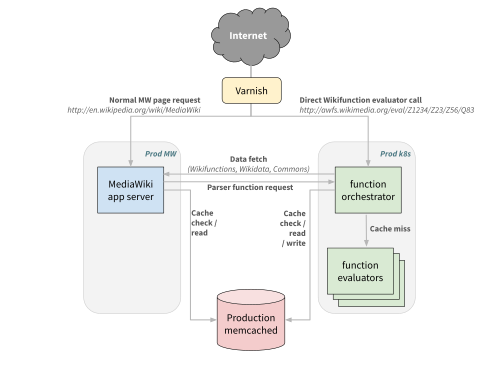